In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
df = pd.read_excel('Tehran_Food_Price.xlsx')
df.head()

,date,month,year,category,commodity,unit,priceflag,pricetype,currency,price,Price(USD)
0,2012-04-15,4,2012,cereals and tubers,Rice,KG,actual,Retail,IRR,26860.0,0.6353
1,2012-04-15,4,2012,"meat, fish and eggs",Eggs,1.8 KG,actual,Retail,IRR,52760.0,1.2479
2,2012-04-15,4,2012,miscellaneous food,Sugar (white),KG,actual,Retail,IRR,15890.0,0.3758
3,2012-04-15,4,2012,oil and fats,Oil (vegetable),810 G,actual,Retail,IRR,25790.0,0.6100
4,2012-04-15,4,2012,pulses and nuts,Lentils (green),900 G,actual,Retail,IRR,27369.0,0.6473


In [3]:
filenames = ['2012.csv','2013.csv','2014.csv','2015.csv','2016.csv','2017.csv','2018.csv','2020.csv','2021.csv']
dfs = [pd.read_csv(filename) for filename in filenames]

In [4]:
font1 = {'family':'serif','color':'red','size':17}
font2 = {'family':'serif','color':'blue','size':15}
font3 = {'family':'serif','color':'black','size':20}

# 9 Years of FoodStuffs price Changing in Tehran Market

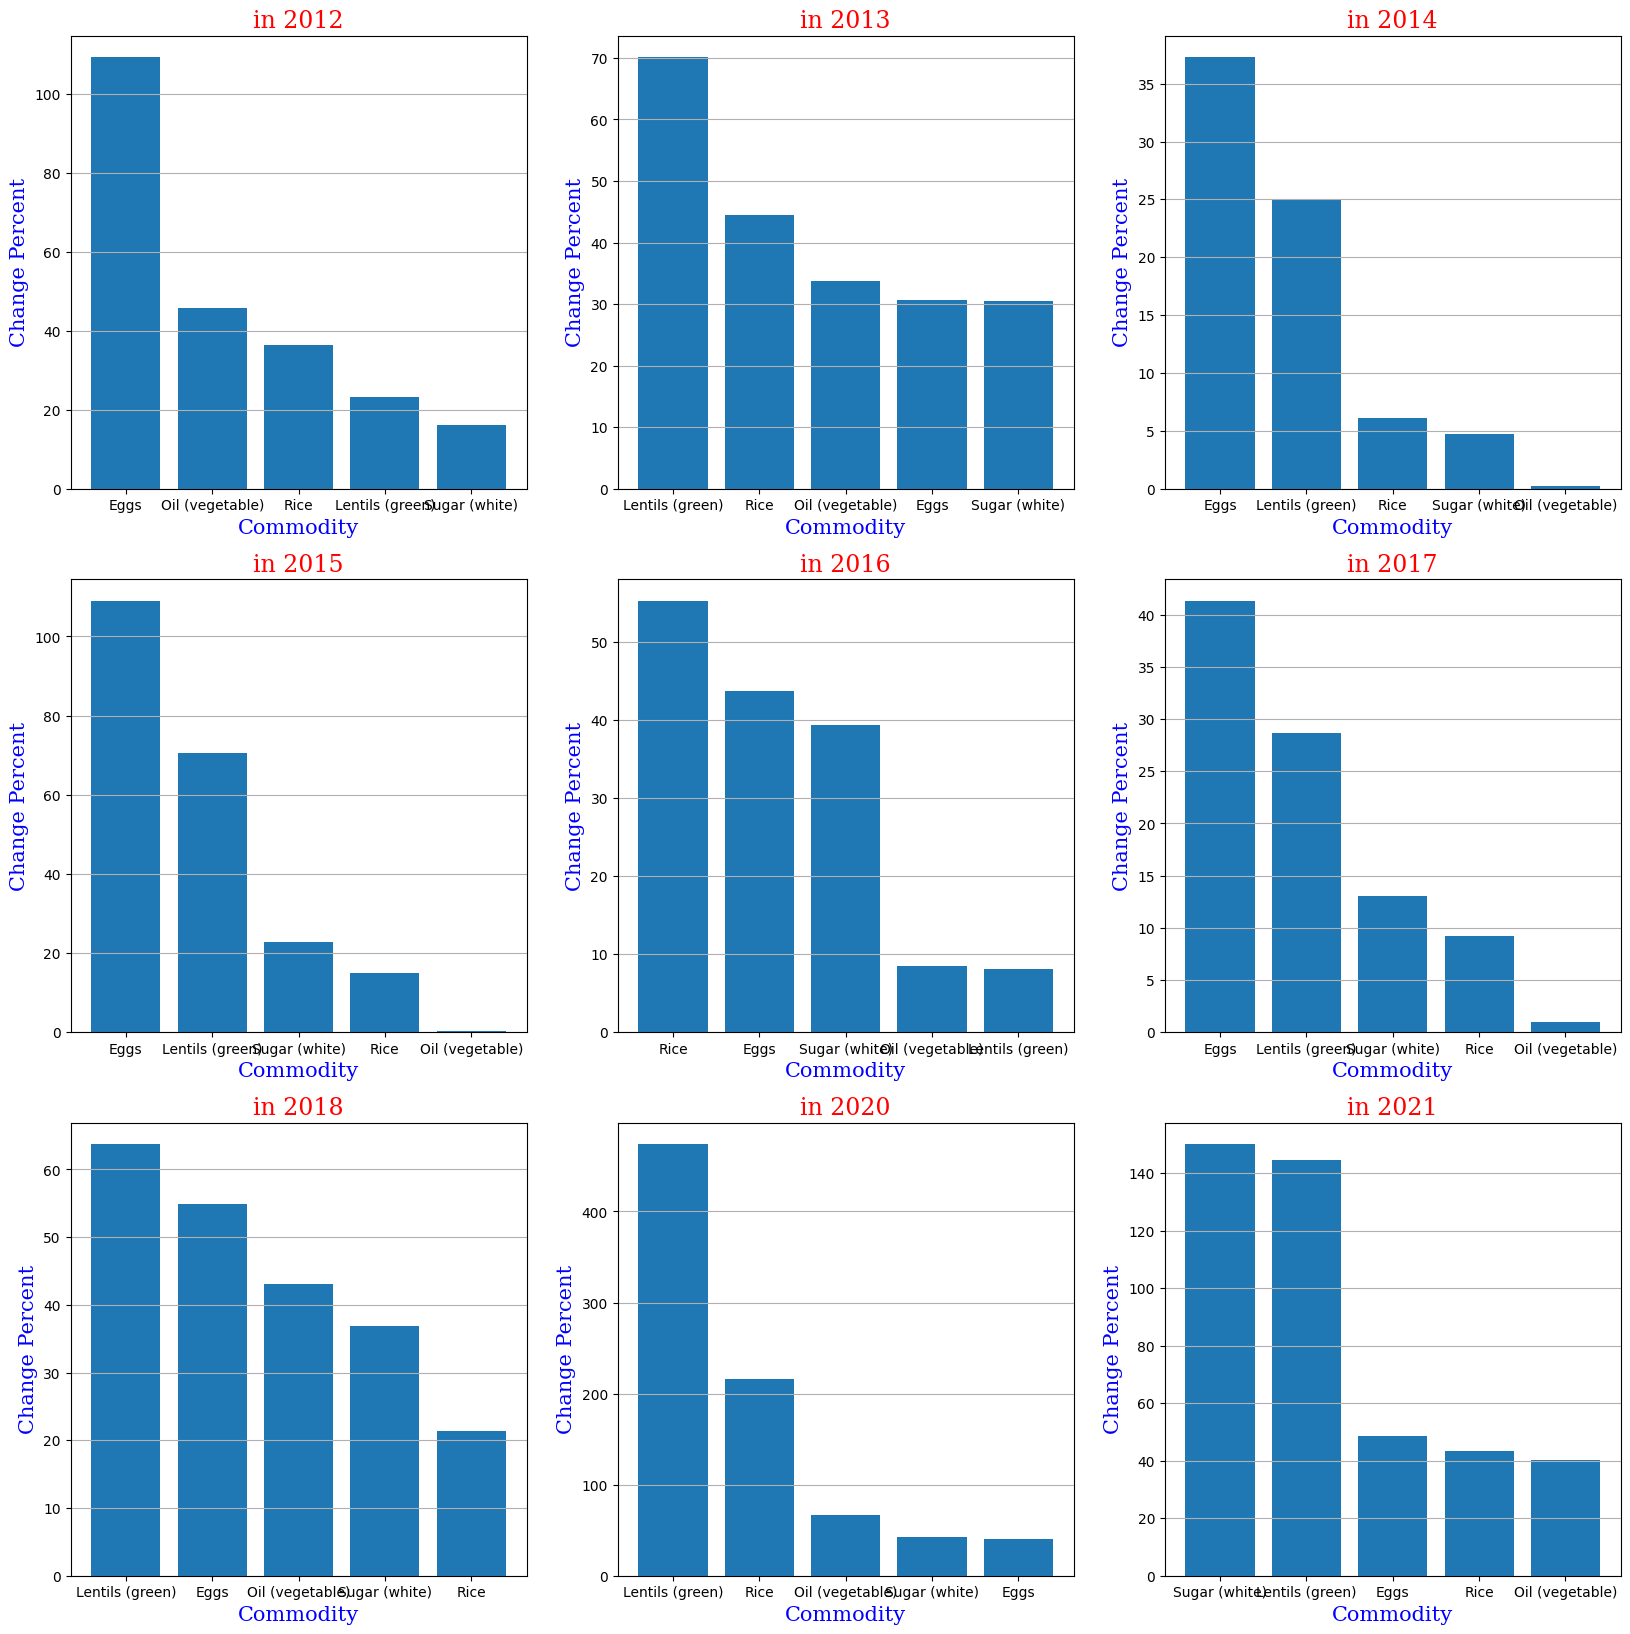

In [5]:
plt.figure(figsize=[20,20])
x = 1
for i in dfs:
    if x < 10:        
        plt.subplot(3,3,x)
                
        plt.grid(axis='y')
        
        year = str(i['year'][0])
        
        plt.title('in '+ year,fontdict=font1)
        
        plt.ylabel('Change Percent',fontdict=font2)
        
        plt.xlabel('Commodity',fontdict=font2)
        
        plt.bar(i['commodity'],i['ChangePCT'])
        x = x+1
plt.show()

### as We can see, in 2020 foodstuff prices have a heavy jump; its maybe because of covid pandemic and lack of materials

# lets See The Average of Changing Percent per Commodity

In [6]:
for x in dfs:
    x.sort_values(by='commodity',inplace=True)

In [25]:
All_Details = []
listt=[]

z=0

while z < 5:

    for i in dfs:
        
        listt.append(sum(i.loc[i['commodity']==i.iloc[z,1],'ChangePCT'])) 
        
        if len(listt)==9:
            details ={
                'commodity': i.iloc[z,1],
                'ChangePCT': round(sum(listt)/len(dfs),2)
            }
            All_Details.append(details)
            listt.clear()
            z=z+1

In [24]:
last_df= pd.DataFrame(avg_df,index=[1,2,3,4,5])
last_df.sort_values('ChangePCT',inplace=True,ascending=False)
last_df

,commodity,ChangePCT
2,Lentils (green),100.83
1,Eggs,57.20
4,Rice,49.74
5,Sugar (white),39.58
3,Oil (vegetable),26.64


# And Show The Maximum Changed Price in 9 Years

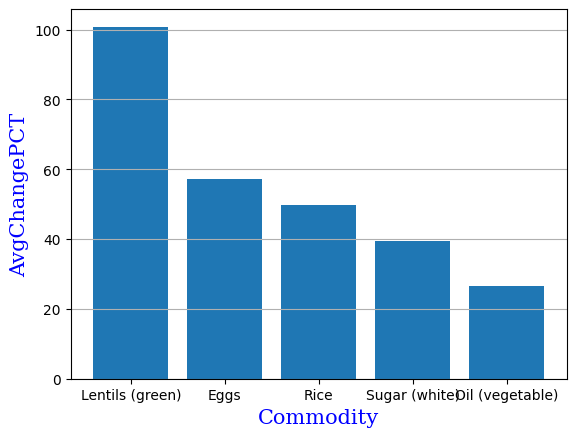

In [27]:
#plt.figure(figsize=[15,15])
plt.bar(last_df['commodity'],last_df['ChangePCT'])
plt.grid(axis='y')
plt.ylabel('AvgChangePCT',fontdict=font2)
plt.xlabel('Commodity',fontdict=font2)
plt.show()